<a href="https://colab.research.google.com/github/Kilvia/MLP-cifar10/blob/main/Cifar20_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import modules

In [3]:
import tensorflow as tf
# Split train set into train/valid set
from sklearn import model_selection
import matplotlib.pyplot as plt

## Load Database

In [4]:
cifar = tf.keras.datasets.cifar10

# Load data and split into test and train
(x_train, y_train), (x_test, y_test) = cifar.load_data()

x_train, x_valid,  y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size=0.2)

# Rescale data to be in the range of [0, 1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']



## Check the Dataset

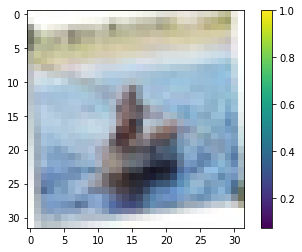

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Model Configuration

In [77]:
#print(x_train.shape[1:])
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32, 3)),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(25, activation='softplus'),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Loss, Optimizer, Metrics

In [78]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optim = tf.keras.optimizers.Adam(learning_rate=0.001)

In [79]:
model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 3072)              0         
                                                                 
 dense_47 (Dense)            (None, 150)               460950    
                                                                 
 dense_48 (Dense)            (None, 125)               18875     
                                                                 
 dense_49 (Dense)            (None, 100)               12600     
                                                                 
 dense_50 (Dense)            (None, 25)                2525      
                                                                 
 dropout_15 (Dropout)        (None, 25)                0         
                                                                 
 dense_51 (Dense)            (None, 10)              

## Training

In [80]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0071 - accuracy: 0.2538 - val_loss: 1.8054 - val_accuracy: 0.3439
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7990 - accuracy: 0.3500 - val_loss: 1.7256 - val_accuracy: 0.3816
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7107 - accuracy: 0.3898 - val_loss: 1.6673 - val_accuracy: 0.3943
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6554 - accuracy: 0.4120 - val_loss: 1.6205 - val_accuracy: 0.4192
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6216 - accuracy: 0.4245 - val_loss: 1.6001 - val_accuracy: 0.4236
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5806 - accuracy: 0.4380 - val_loss: 1.5618 - val_accuracy: 0.4409
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5627 - accuracy: 0.4438 - val_loss: 1.6036 - val_accuracy:

## Check Results

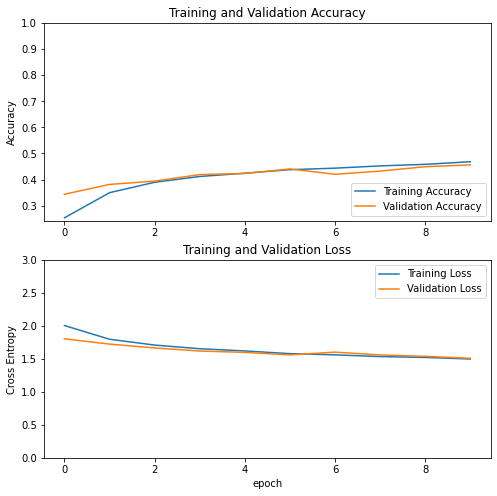

In [81]:
# Training accuracy and validation accuracy
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Training loss and validation loss
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Make a graph to see the results
# Accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

# Show the 2 graphs
plt.show()

In [82]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 1.5113 - accuracy: 0.4636 - 543ms/epoch - 2ms/step


[1.5112738609313965, 0.4636000096797943]

In [83]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step
